In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import urllib.request


Loading Data

In [39]:
housing = pd.read_csv(Path("datasets/housing/housing.csv"))
train_set = pd.read_csv("data/train")

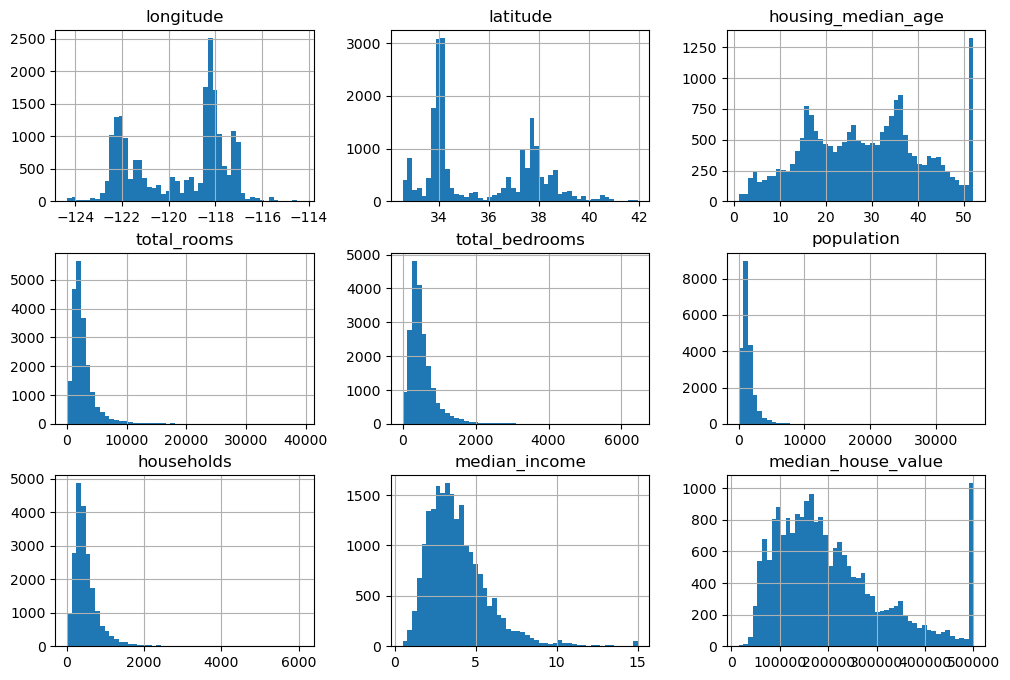

In [40]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

Visualizing Geographical Data

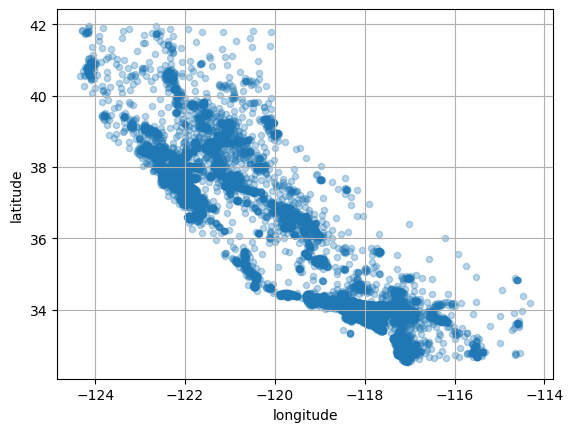

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha = 0.3)
plt.show()

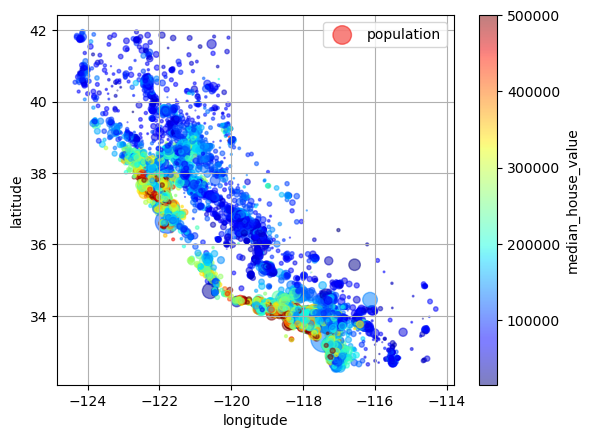

In [42]:
housing.plot(kind="scatter", 
            x="longitude", y="latitude", grid=True,
            s=housing["population"]/100,
            label="population",
            c="median_house_value",
            cmap="jet",
            colorbar=True,
            legend=True,
            sharex=False,
            alpha=0.5
            )
plt.show()

Error: name 'save_fig' is not defined


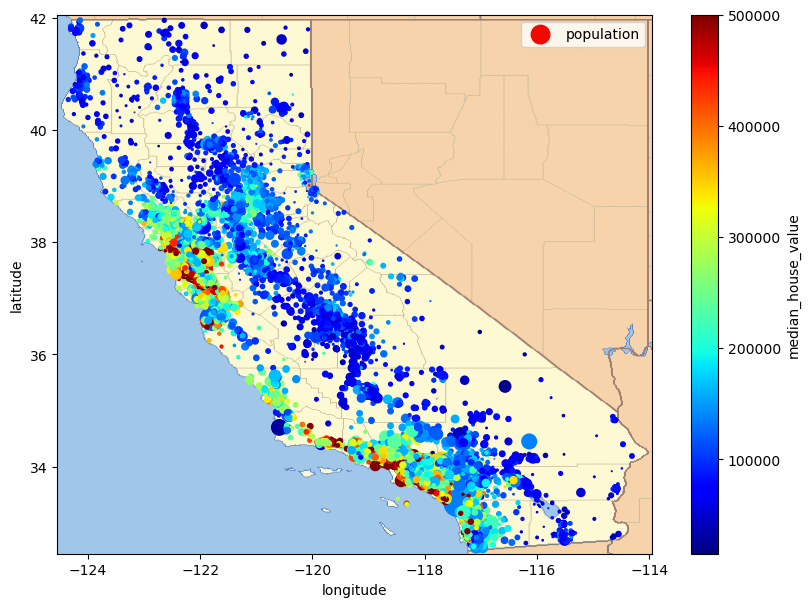

In [43]:
filename = "california.png"
try : 
    if not Path("images/" + filename).is_file():
        url = "https://github.com/ageron/handson-ml3/raw/main/images/end_to_end_project/"+ filename
        urllib.request.urlretrieve(url,"images/" + filename)
except Exception as e:
    print(f"Error: {e}")

housing.plot(
             kind="scatter", x="longitude", y="latitude",
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

try:
    california_img = plt.imread("images/california.png")
    axis = -124.55, -113.95, 32.45, 42.05
    plt.axis(axis)
    plt.imshow(california_img, extent=axis)

    save_fig("california_housing_prices_plot")
    plt.show()
except Exception as e:
    print(f"Error: {e}")



Correlations

In [50]:
corr_matrix = housing.corr(numeric_only=True)

print("correlation with median house value")
corr_matrix["median_house_value"].sort_values(ascending=False)

correlation with median house value


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

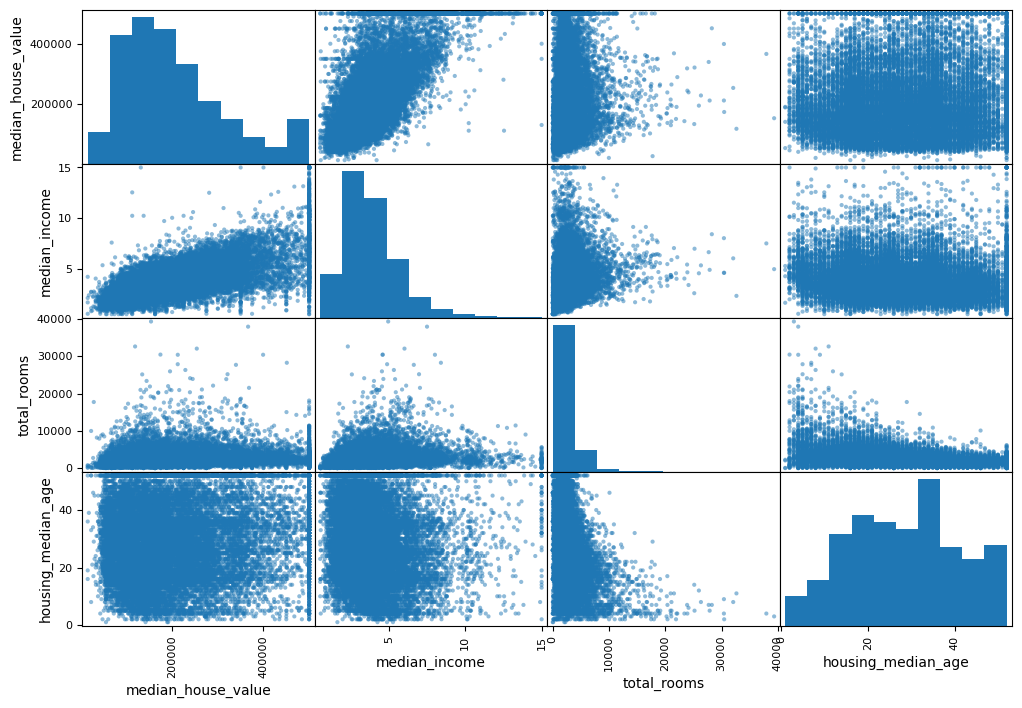

In [52]:
from pandas.plotting import scatter_matrix

att = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[att], figsize=(12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

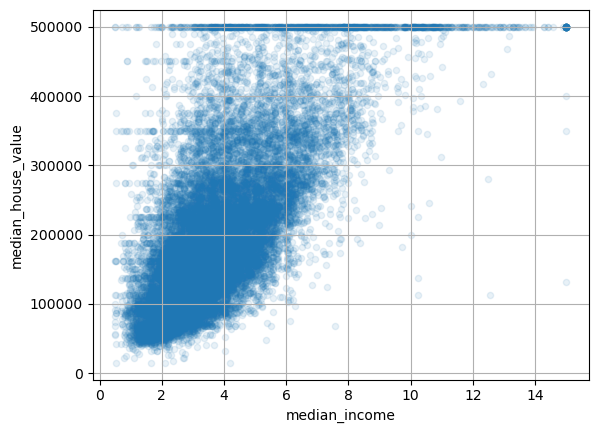

In [57]:
housing.plot(kind="scatter",x="median_income", y="median_house_value",
             alpha=0.1,
             grid=True)

Various attribute combinations

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["people_per_house"] = housing["population"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

In [61]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64